# CPSC 330 - Applied Machine Learning 

## Homework 9: Communication

<div class="alert alert-info">
    
## Submission instructions
<hr>
rubric={points:2}

Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2024W1/blob/main/docs/homework_instructions.md). 

**You may work in a group on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 2. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).


When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from “1” will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission.
4. Make sure that the plots and output are rendered properly in your submitted file. 
5. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb.

<br><br><br><br>

<br><br><br><br>

In [1]:
from IPython.display import Image

## Exercise 1: Communication
<hr>

### 1.1 Blog post 
rubric={points:26}

Write up your analysis from hw5 or any other assignment or your side project on machine learning in a "blog post" or report format. It's fine if you just write it here in this notebook. Alternatively, you can publish your blog post publicly and include a link here. (See exercise 1.3.) The target audience for your blog post is someone like yourself right before you took this course. They don't necessarily have ML knowledge, but they have a solid foundation in technical matters. The post should focus on explaining **your results and what you did** in a way that's understandable to such a person, **not** a lesson trying to teach someone about machine learning. Again: focus on the results and why they are interesting; avoid pedagogical content.

Your post must include the following elements (not necessarily in this order):

- Description of the problem/decision.
- Description of the dataset (the raw data and/or some EDA).
- Description of the model.
- Description your results, both quantitatively and qualitatively. Make sure to refer to the original problem/decision.
- A section on caveats, describing at least 3 reasons why your results might be incorrect, misleading, overconfident, or otherwise problematic. Make reference to your specific dataset, model, approach, etc. To check that your reasons are specific enough, make sure they would not make sense, if left unchanged, to most students' submissions; for example, do not just say "overfitting" without explaining why you might be worried about overfitting in your specific case.
- At least 3 visualizations. These visualizations must be embedded/interwoven into the text, not pasted at the end. The text must refer directly to each visualization. For example "as shown below" or "the figure demonstrates" or "take a look at Figure 1", etc. It is **not** sufficient to put a visualization in without referring to it directly.

A reasonable length for your entire post would be **800 words**. The maximum allowed is **1000 words**.

#### Example blog posts

Here are some examples of applied ML blog posts that you may find useful as inspiration. The target audiences of these posts aren't necessarily the same as yours, and these posts are longer than yours, but they are well-structured and engaging. You are **not required to read these** posts as part of this assignment - they are here only as examples if you'd find that useful.

From the UBC Master of Data Science blog, written by a past student:

- https://ubc-mds.github.io/2019-07-26-predicting-customer-probabilities/

This next one uses R instead of Python, but that might be good in a way, as you can see what it's like for a reader that doesn't understand the code itself (the target audience for your post here):

- https://rpubs.com/RosieB/taylorswiftlyricanalysis

Finally, here are a couple interviews with winners from Kaggle competitions. The format isn't quite the same as a blog post, but you might find them interesting/relevant:

- https://medium.com/kaggle-blog/instacart-market-basket-analysis-feda2700cded
- https://medium.com/kaggle-blog/winner-interview-with-shivam-bansal-data-science-for-good-challenge-city-of-los-angeles-3294c0ed1fb2


#### A note on plagiarism

You may **NOT** include text or visualizations that were not written/created by you. If you are in any doubt as to what constitutes plagiarism, please just ask. For more information see the [UBC Academic Misconduct policies](http://www.calendar.ubc.ca/vancouver/index.cfm?tree=3,54,111,959). Please don't copy this from somewhere or ask Generative AI to write it for you 🙏. 

# Can a Machine Tell If You’ll Default Next Month?
This summer, I had an opportunity to learn some machine learning. In one of my assignments, I get to work with a dataset that contains information on demographic factors, and credit card history of 30,000 credit card clients in Taiwan from April to September 2005. The goal is to predict, given the data of a customer, are they likely to default on the following month or not?
## Splitting the Data
The first step I did is splitting the data into two sets. The first set consists of 70% of the data, which I used to train the models. The remaining 30% will be used on the very end to test the model. 
## Data Analysis
Next, I’m doing some exploratory data analysis on the data to get a better understanding on the data and do some clean up after. Did you know that the majority of time in a machine learning project is spent on data preparation? 

Here is how our first 5 rows of our dataset look like:

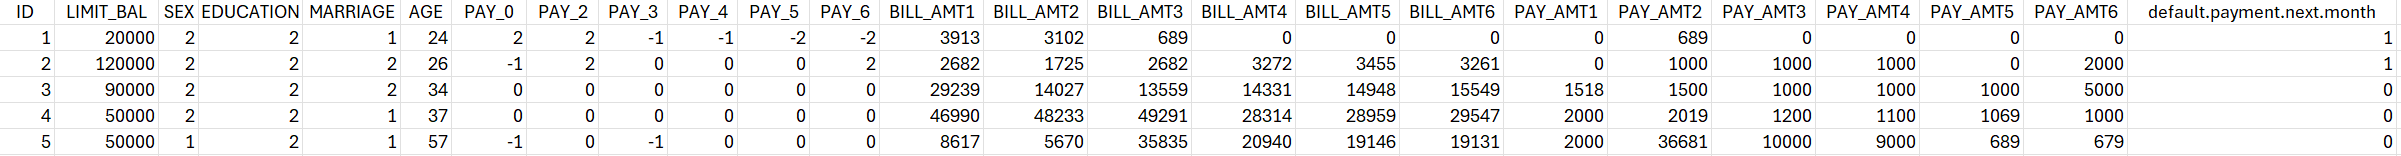

In [2]:
Image("img/Picture1.png")

We have a total of 24 columns, 23 of which we could potentially use to determine the value of the last column, labeled "default.payment.next.month". Most of the name of the columns are self-explanatory. PAY_i refers to the client’s repayment status on that month with the following scale: -1=pay duly, 1=payment delay for one month, … , 9=payment delay for nine months and above. 

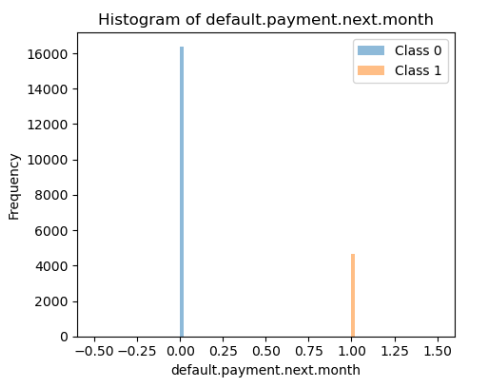

In [3]:
Image("img/imbal.png")

Right away, I noticed that we have way more clients who didn’t default (Class 0) than those who did (Class 1). This means we have a class imbalance. This tells that accuracy isn’t the best metric to use to assess our model’s performance. I decided to use a metric that balances between minimizing false positive and false negative, called the F1-score.

Additionally, I performed some imputation by manually replacing invalid entries with missing values. This keeps our data consistent and clean.
## Feature Engineering
Some features aren’t very useful on their own, so I created features that could potentially capture some relationship that would be invisible otherwise. Here are the resulting features:
-	Unpaid amount and credit card utilization for each month
-	A boolean column indicating whether the client overpaid in any of the six months
-	Total bill, payment, and unpaid amount across six months
-	Average credit card utilization across six months
## Data Preprocessing
Next, I fill in the missing values present on some of the categorical features by filling it in as a constant. Then, for the numerical features (age, bill amount, etc), I did some scaling, and I encoded the rest of the categorical feature.  

Additionally, I dropped the ‘sex’ column since it doesn't determine whether or not someone defaults. Not to mention, the binary classification for gender is outdated.
By the end of this step, we have 46 features in total!
# Models and Initial Scores
There are several models I used on this project, namely LogisticRegression, RandomForestClassifier, KNeighbourClassifier, and LGBMClassifier. Here are the results of the top 3 right off the shelf:

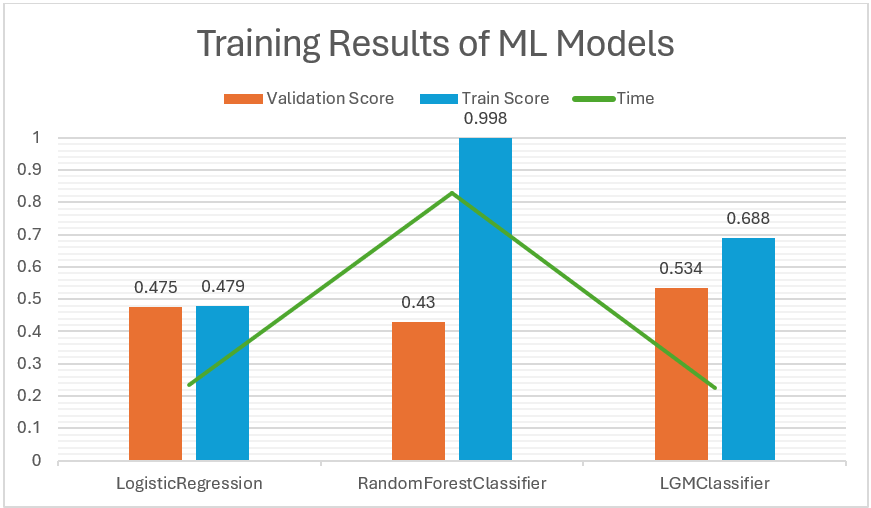

In [4]:
Image("img/res1.png")

The validation scores are what we are focusing on, which gives an estimate of how the models perform.  A similar validation and training score means that the model generalizes well to unseen data. As you can see, RandomForrestClassifier seems to be performing the worst, and took the longest. It also has very big gap between scores, but this is completely normal for RandomForrestClassifier. LGBMClassifier may not generalize the best, but note that this is not our final model.
## Optimizing the Model
You may be wondering if all 46 features we used are necessary. I was wondering the same, so I performed feature selection to eliminate some of the unnecessary ones. I used another model, XGBClassifier, to do this with SelectFromModel(). The algorithm eliminated half of the total feature. Unfortunately, there is no improvement other than a 5.35% increase on RandomForestClassifier score. So, moving on, I kept all 46 features on LogisticRegression and LGBMClassifier, but kept only the 23 selected features on RandomForestClassifier.

Then, I adjusted the parameters of the model to find the optimal combination that results in the best score.

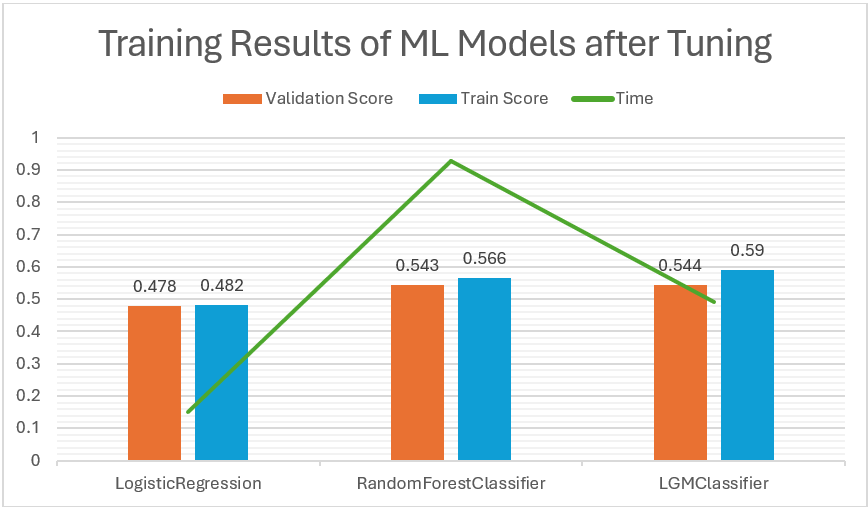

In [5]:
Image("img/res2.png")

As we can see, there is not much improvement on the validation scores LogisticRegression and LGBMClassifier. RandomForestClassifier seem to have the most improvement, though LGBMClassifier still has a higher score, also seems like it generalizes better now. Additionally, it performs twice as fast as RandomForestClassifier. Therefore, I decided to use LGBMClassifier as my final model
## Test Result
Finally, I assess the LGBMClassifier model on the 30% test data mentioned on the beginning. This shows how well the model perform on unseen data.

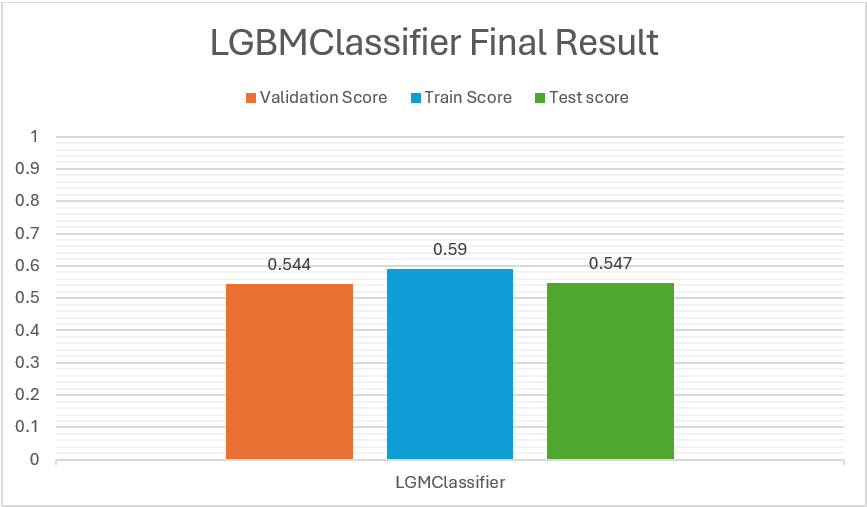

In [6]:
Image("img/finres.png")

As seen on the table above, our final test score is pretty consistent with the validation and training score. This means our final model generalize well on unseen data.
With a 0.547 final test score, I don’t think the final model is not good enough. This does not mean that it predicts correctly 54.7% of time. It means that it’s 54.7% right on average when catching clients who will actually default and avoiding tagging the wrong clients.
# Final Remarks
The low scores could be due to several factors. One may be due to the class imbalance we started with. Since we lack data on one class, the model might struggle learning patterns on the minority class. To tackle this, we could try resampling the data so achieve a balanced dataset. 

Additionally, I have adjusted only two of the LGBMClassifier’s parameter, when there is a lot more I could try adjusting. It is likely that there could be another parameter which would significantly increase the performance with a certain value. 

Finally, knowledge on the dataset and domain is crucial. Since I am not an expert in finance or credit scores, I wasn’t able to fully utilize the provided features or engineer the new ones that could provide useful patterns for the models.

*word count: 994*

<br><br>

### 1.2 Effective communication technique
rubric={points:4}

Describe one effective communication technique that you used in your post, or an aspect of the post that you are particularly satisfied with. (Max 3 sentences.)

I believe I used the bottom-up explanation on some parts, where I started slow then started introducing ml-related terms. For example, on the paragraph where I showed the class imbalance, I started by saying one class is way more dominant than other, before mentioning class imbalance. Then I continued by saying that the scoring metric 'accuraccy', which people are familiar with, is not the best metric to use, before I finally introduced f1-score.

<br><br>

### (optional, not for marks) 1.3

Publish your blog post from 1.1 publicly using a tool like [Quarto](https://quarto.org/), or somewhere like medium.com, and paste a link here. Be sure to pick a tool in which code and code output look reasonable. This link could be a useful line on your resume!

<br><br><br><br>

## Exercise 2: Your takeaway from the course 
rubric={points:2}

**Your tasks:**

- Reflect on your journey through this course. Please identify and elaborate on at least three key concepts or experiences where you had an "aha" moment. How would you use the concepts learned in this course in your personal projects or how would you approach your past projects differently based on the insights gained in this course? We encourage you to dig deep and share your genuine reflections.

> Please write thoughtful answers. We are looking forward to reading them 🙂. 

I personally find this course to be very fun and insightful. After taking this course, I have a better understanding on what counts as machine learning. 

Using machine learning itself turns out to be not as complicated as I expected (on some cases) since we already have a bunch of models from various libraries available to use, though I never expected data preparation to have a very big impact on a model's performance and takes up so much time. Additionally, it has never crossed my mind that when evaluating a model's performance, the choice of metric used can give a misleading result. I never thought that a model could just predict the majority class 100% of time and still have a high accuracy with an imbalance dataset, but it felt very obvious now. Finally, I find the concept of NLP mind-blowing. Learning how the search engine or AI chat models understand user's input was probably my biggest "aha" moment, especially given how ambiguos and messy it can be.

I am not sure yet how I would incorporate machine learning into my projects. However, I am thinking of doing some projects related to machine learning just to learn more of it and explore more ML-related libraries.

<br><br><br><br>

**Before submitting your assignment, please make sure you have followed all the instructions in the Submission instructions section at the top.** 

### Congratulations 👏👏

That's all for the assignments! Congratulations on finishing all homework assignments! 

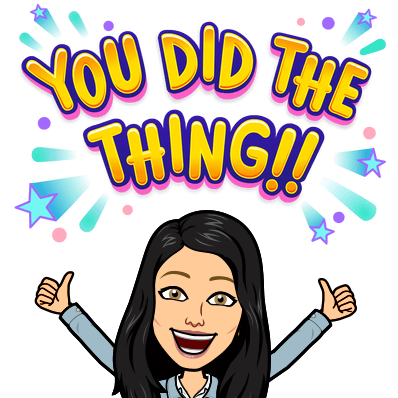

In [7]:
from IPython.display import Image

Image("img/eva-congrats.png")